# Maths for the 2 population sinusoidal activity case

Going from the abstract case to the case with 2 populations. 

First we look at the 4 population fly network and see that if we compress the 3 excitatory populations together, we get the following connectivity for an EI network

* EE - all to all
* EI - all to all
* IE - one to one
* II - all to all (minus the main diagonal - no recurrence)

Given that the weight matrices are circulant, we express them as weight profiles instead

ie. $W_{EE} \equiv \omega_{EE}$

Then we can right the differential equations for the network activities, $a$, assuming leaky rate based neurons

$$\begin{align*}
	\dot a_E &= - a_E + \omega_{EE}\ast a_E - \omega_{IE}a_I \\
	\dot a_I &= - a_I + \omega_{EI}\ast a_E - \omega_{II}\ast a_I
\end{align*}$$

Considering the stable case ($\dot a_E = \dot a_I = 0$) and going to the Fourier domain

$$\begin{aligned}
	\mathcal{F}_f[a_E] &= \mathcal{F}_f[\omega_{EE}]\mathcal{F}_f[a_E] - \omega_{IE}\mathcal{F}_f[a_I] \\
	\mathcal{F}_f[a_I] &= \mathcal{F}_f[\omega_{EI}]\mathcal{F}_f[a_E] - \mathcal{F}_f[\omega_{II}]\mathcal{F}_f[a_I] \\
\end{aligned}$$

Simplifying the inhibitory equation and substituting it into the first

$$\begin{aligned}
	(1 + \mathcal{F}_f[\omega_{II}]) \mathcal{F}_f[a_I] &= \mathcal{F}_f[\omega_{EI}]\mathcal{F}_f[a_E] \\
	\therefore \mathcal{F}_f[a_E] &= \left(\mathcal{F}_f[\omega_{EE}] - \frac{\omega_{IE}\mathcal{F}_f[\omega_{EI}]}{1 + \mathcal{F}_f[\omega_{II}]}\right)\mathcal{F}_f[a_E]
\end{aligned}$$

For this to be stable for a given harmonic, at least one of the following conditions must be met:

* $\mathcal{F}_f[a_E] = 0$
* $\mathcal{F}_f[\omega_{EE}] - \frac{\omega_{IE}\mathcal{F}_f[\omega_{EI}]}{1 + \mathcal{F}_f[\omega_{II}]} = 1$

The second of these has a number of possible solutions

**Case 1:**

$\omega_{IE} = 0$ and $\mathcal{F}_f[\omega_{EE}]=1$

Because the I to E connectivity is one to one, we can only set it to zero for all Fourier modes at once. In this case the inhibitory population doesn't affect the excitatory at all so we recover the one population case.

**Case 2:**

$\mathcal{F}_f[\omega_{EI}] = 0$ and $\mathcal{F}_f[\omega_{EE}]=1$

Here the excitatory population doesn't project to the inhibitory population for a certain harmonic, so it ends up being silent. In effect, this is similar to the solution for case 1, except it can be applied individually to each harmonic. For example, the excitatory population could have sinusoidal activity, but the inhibitory population not (case 2 for harmonic 1). But then both populations could interact with their DC activity (case 3 for DC activity).

**Case 3:**

$\omega_{IE} > 0$, $\mathcal{F}_f[\omega_{EI}] > 0$, and $\mathcal{F}_f[\omega_{EE}] \geq 1$

$\mathcal{F}_f[\omega_{EE}] - \frac{\omega_{IE}\mathcal{F}_f[\omega_{EI}]}{1 + \mathcal{F}_f[\omega_{II}]} = 1$

This is the non-trivial case where the two populations actually interact. Essentially, we can increase the self excitation above the stable level and have it compensated for by the inhibition.

The stable solution should be when the activities are in the following proportions

$\mathcal{F}_f[a_I] = \frac{\mathcal{F}_f[\omega_{EI}]}{1 + \mathcal{F}_f[\omega_{II}]}\mathcal{F}_f[a_E]$

## Example solutions

For the sinusoidal activity case, we fulfil case 3 for the third harmonic, setting all the other harmonics to 0 to stop activity propagation at these frequencies

$\mathcal{F}_1[\omega_{EE}] = 2$, $\omega_{IE}=1$, $\mathcal{F}_1[\omega_{EI}] = 2$, $\mathcal{F}_1[\omega_{II}] = 1$

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
plt.style.use('seaborn-notebook')
np.random.seed(7) # seed so plots are repeatable
plt.rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
plt.rc('text', usetex=True)
profile_to_matrix = lambda profile: scipy.linalg.circulant(profile)
fourier_modes_to_time_domain = lambda fourier_modes: np.fft.ifft(np.hstack((fourier_modes, np.flip(fourier_modes[1:-1])))).real

In [194]:
N = 16
w_ee = 2
w_ie = 1
w_ei = 2
w_ii = 1
W_EE = profile_to_matrix(fourier_modes_to_time_domain([0,w_ee] + [0]*(N//2+1-2)))
W_IE = profile_to_matrix(fourier_modes_to_time_domain([w_ie]*(N//2+1)))
W_EI = profile_to_matrix(fourier_modes_to_time_domain([0,w_ei] + [0]*(N//2+1-2)))
W_II = profile_to_matrix(fourier_modes_to_time_domain([0,w_ii] + [0]*(N//2+1-2)))

expected solution: a_I = 1.0a_E


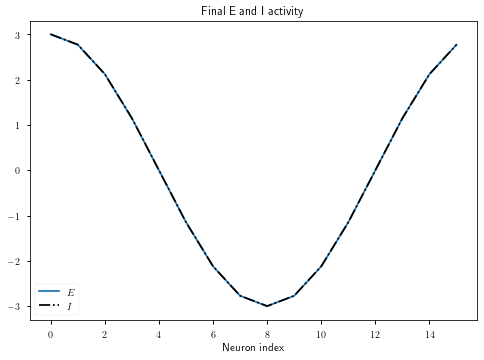

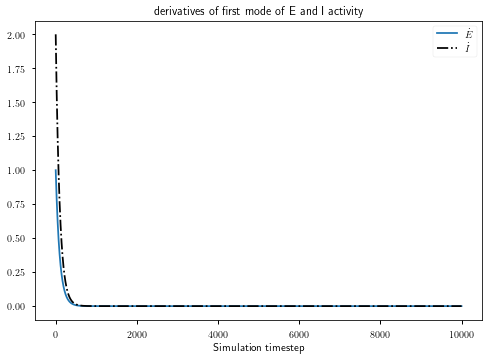

In [195]:
print(f'expected solution: a_I = {w_ei / (1+w_ii)}a_E')

a_E = 2*np.cos(2*np.pi/N*np.arange(N)).reshape(N,1)
a_I = np.cos(2*np.pi/N*np.arange(N)).reshape(N,1)
a_E_dot_trace = []
a_I_dot_trace = []

for _ in range(10000):
	a_E_dot = -a_E + W_EE@a_E - W_IE@a_I
	a_I_dot = -a_I + W_EI@a_E - W_II@a_I
	a_E += 0.01*a_E_dot
	a_I += 0.01*a_I_dot
	a_E_dot_trace.append(a_E_dot)
	a_I_dot_trace.append(a_I_dot)

plt.plot(a_E, label='$E$')
plt.plot(a_I, 'k-.', label='$I$')
plt.title('Final E and I activity')
plt.xlabel('Neuron index')
plt.legend()
plt.show()

plt.plot(np.array(a_E_dot_trace)[:,0], label=r'$\dot E$')
plt.plot(np.array(a_I_dot_trace)[:,0], 'k-.', label=r'$\dot I$')
plt.title('derivatives of first mode of E and I activity')
plt.xlabel('Simulation timestep')
plt.legend()
plt.show()

This all looks good - the solution matches the expected, with $a_E = a_I$

Trying another solution with more self excitation

$\mathcal{F}_1[\omega_{EE}] = 3$, $\omega_{IE}=1$, $\mathcal{F}_1[\omega_{EI}] = 4$, $\mathcal{F}_1[\omega_{II}] = 1$

In [196]:
N = 16
w_ee = 3
w_ie = 1
w_ei = 4
w_ii = 1
W_EE = profile_to_matrix(fourier_modes_to_time_domain([0,w_ee] + [0]*(N//2+1-2)))
W_IE = profile_to_matrix(fourier_modes_to_time_domain([w_ie]*(N//2+1)))
W_EI = profile_to_matrix(fourier_modes_to_time_domain([0,w_ei] + [0]*(N//2+1-2)))
W_II = profile_to_matrix(fourier_modes_to_time_domain([0,w_ii] + [0]*(N//2+1-2)))

expected solution: a_I = 2.0a_E


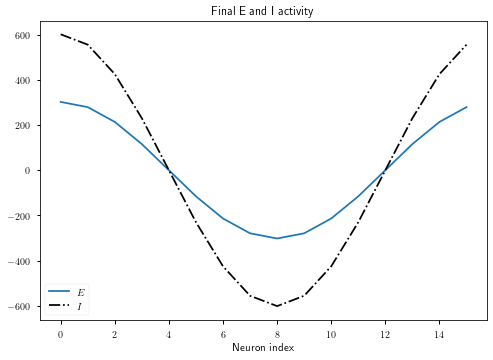

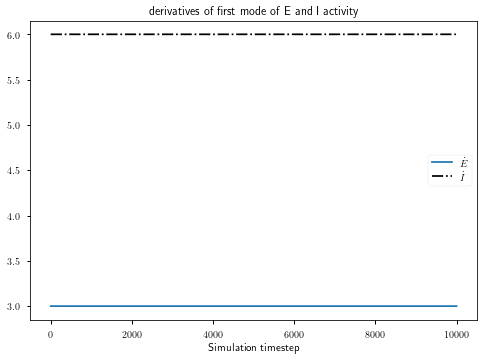

In [197]:
print(f'expected solution: a_I = {w_ei / (1+w_ii)}a_E')

a_E = 2*np.cos(2*np.pi/N*np.arange(N)).reshape(N,1)
a_I = np.cos(2*np.pi/N*np.arange(N)).reshape(N,1)
a_E_dot_trace = []
a_I_dot_trace = []

for _ in range(10000):
	a_E_dot = -a_E + W_EE@a_E - W_IE@a_I
	a_I_dot = -a_I + W_EI@a_E - W_II@a_I
	a_E += 0.01*a_E_dot
	a_I += 0.01*a_I_dot
	a_E_dot_trace.append(a_E_dot)
	a_I_dot_trace.append(a_I_dot)

plt.plot(a_E, label='$E$')
plt.plot(a_I, 'k-.', label='$I$')
plt.title('Final E and I activity')
plt.xlabel('Neuron index')
plt.legend()
plt.show()

plt.plot(np.array(a_E_dot_trace)[:,0], label=r'$\dot E$')
plt.plot(np.array(a_I_dot_trace)[:,0], 'k-.', label=r'$\dot I$')
plt.title('derivatives of first mode of E and I activity')
plt.xlabel('Simulation timestep')
plt.legend()
plt.show()

This case isn't stable though - the activity keeps growing indefinitely.

Looking at the eigenvalues of the derivatives, which are:

$$\begin{align*}
	\dot a_E &= - a_E + \omega_{EE}\ast a_E - \omega_{IE}a_I \\
	\dot a_I &= - a_I + \omega_{EI}\ast a_E - \omega_{II}\ast a_I
\end{align*}$$

In [198]:
np.linalg.eigvals(np.array([[w_ee-1,-w_ie],[w_ei,-w_ii-1]]))

array([2.26966063e-17, 2.26966063e-17])

In this case the eigenvalues are both zero - suggesting the system is minimally stable.

If we simulate starting at the stable point $a_I = 2a_E$ then we expect it to stay stable

expected solution: a_I = 2.0a_E


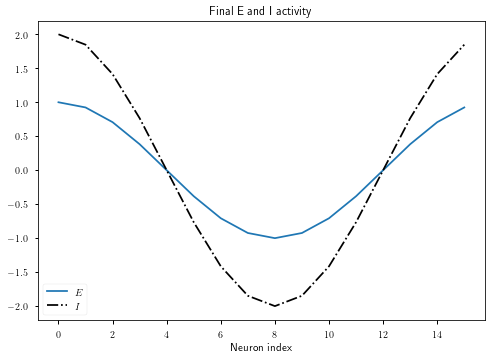

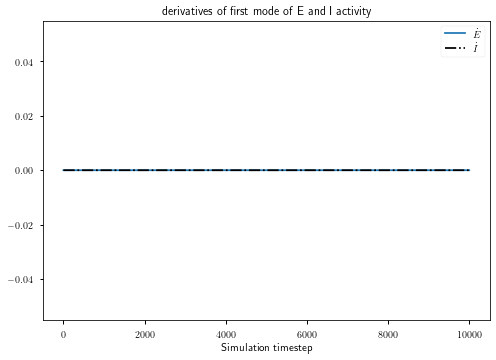

In [199]:
print(f'expected solution: a_I = {w_ei / (1+w_ii)}a_E')

a_E = np.cos(2*np.pi/N*np.arange(N)).reshape(N,1)
a_I = 2*np.cos(2*np.pi/N*np.arange(N)).reshape(N,1)
a_E_dot_trace = []
a_I_dot_trace = []

for _ in range(10000):
	a_E_dot = -a_E + W_EE@a_E - W_IE@a_I
	a_I_dot = -a_I + W_EI@a_E - W_II@a_I
	a_E += 0.01*a_E_dot
	a_I += 0.01*a_I_dot
	a_E_dot_trace.append(a_E_dot)
	a_I_dot_trace.append(a_I_dot)

plt.plot(a_E, label='$E$')
plt.plot(a_I, 'k-.', label='$I$')
plt.title('Final E and I activity')
plt.xlabel('Neuron index')
plt.legend()
plt.show()

plt.plot(np.array(a_E_dot_trace)[:,0], label=r'$\dot E$')
plt.plot(np.array(a_I_dot_trace)[:,0], 'k-.', label=r'$\dot I$')
plt.title('derivatives of first mode of E and I activity')
plt.xlabel('Simulation timestep')
plt.legend()
plt.show()

Yes, this works fine

We characterised all solutions to the system, but also need to check whether the fixed points are stable

The eigenvalues of the system are:

$$\lambda = \left(\mathcal{F}_1[\omega_{EE}] - \mathcal{F}_1[\omega_{II}] - 2\right) \pm \sqrt{\mathcal{F}_1[\omega_{EE}]^2 + \mathcal{F}_1[\omega_{II}]^2 + 2\mathcal{F}_1[\omega_{EE}]\mathcal{F}_1[\omega_{II}] - 4\omega_{IE}\mathcal{F}_1[\omega_{EI}}]$$